# Linear Models
## Linear models for regression

w[0]: 0.393906  b: -0.031804


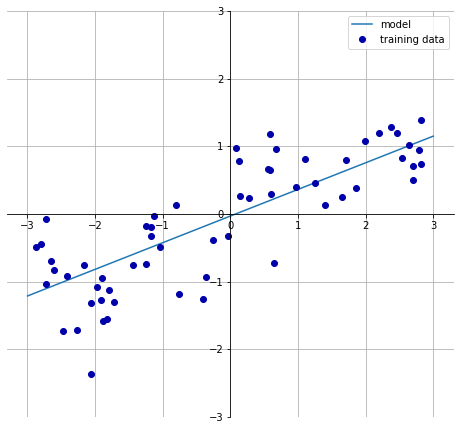

In [1]:
import mglearn
import numpy as np
mglearn.plots.plot_linear_regression_wave()

### Linear regression (ordinary least squares)

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print(f'lr.coef_: {lr.coef_}')
print(f'lr.intercept_: {lr.intercept_}')
print(f'Training set score: {lr.score(X_train, y_train):.2f}')
print(f'Test set score: {lr.score(X_test, y_test):.2f}')
# Similar training and testing set scores suggests under-fitting. Low risk of over-fitting on simple datasets like this.

lr.coef_: [0.39390555]
lr.intercept_: -0.03180434302675976
Training set score: 0.67
Test set score: 0.66


In [3]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print(f'Training set score: {lr.score(X_train, y_train):.2f}')
print(f'Test set score: {lr.score(X_test, y_test):.2f}')
# Discrepancy between training and testing sets indicates over-fitting.

Training set score: 0.95
Test set score: 0.61


### Ridge regression
Ridge regressions use L2 regularization to restrict coefficient magnitude.

In [4]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print(f'Training set score: {ridge.score(X_train, y_train):.2f}')
print(f'Test set score: {ridge.score(X_test, y_test):.2f}')
# A less complex model means worse training performance but better generalization.

Training set score: 0.89
Test set score: 0.75


In [5]:
# Tweak alpha parameter (regularization parameter) to drive coefficients closer to zero.
# Decreases training performance but may increase generalization performance.
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(f'Training set score: {ridge.score(X_train, y_train):.2f}')
print(f'Test set score: {ridge.score(X_test, y_test):.2f}')

Training set score: 0.89
Test set score: 0.75


In [6]:
# Tweak alpha parameter to reduce coefficient restrictions.
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(f'Training set score: {ridge.score(X_train, y_train):.2f}')
print(f'Test set score: {ridge.score(X_test, y_test):.2f}')

Training set score: 0.89
Test set score: 0.75


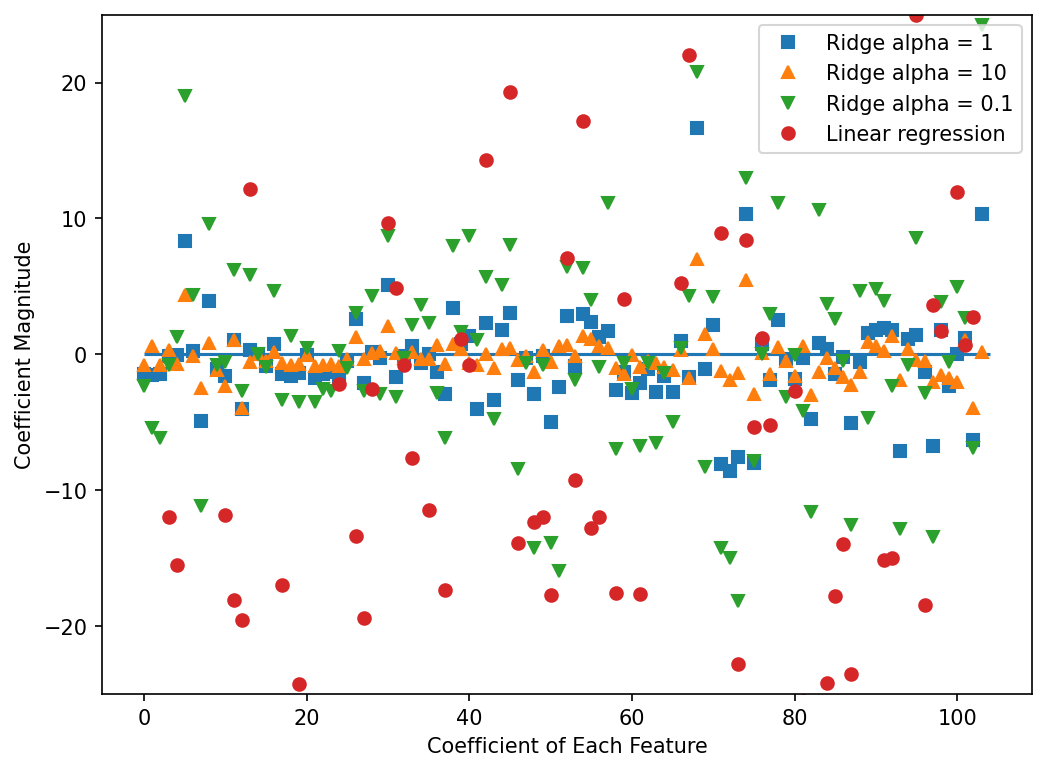

In [7]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,6), dpi=150)
plt.plot(ridge.coef_, 's', label='Ridge alpha = 1')
plt.plot(ridge10.coef_, '^', label='Ridge alpha = 10')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha = 0.1')

plt.plot(lr.coef_, 'o', label='Linear regression')
plt.xlabel('Coefficient of Each Feature')
plt.ylabel('Coefficient Magnitude')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

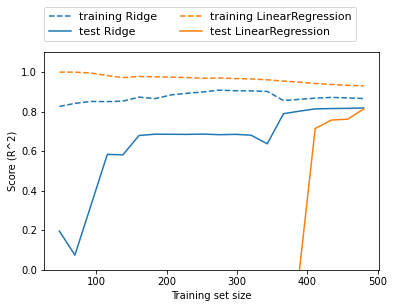

In [8]:
mglearn.plots.plot_ridge_n_samples()
# Big idea: regularization becomes less important with more training data

### Lasso regression
Lasso regression uses L1 regularization, so some coefficients are exactly zero. (In other words: the model ignores some features.) Very good for data with a lot of features but only a few may be important.

In [9]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print(f'Training set score: {lasso.score(X_train, y_train):.2f}')
print(f'Test set score: {lasso.score(X_test, y_test):.2f}')
print(f'Number of features used: {np.sum(lasso.coef_ != 0)}')    # Recall that there are 105 features in the extended Boston dataset

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [10]:
# Reduce alpha to reduce under-fitting. Requires more iterations.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print(f'Training set score: {lasso001.score(X_train, y_train):.2f}')
print(f'Test set score: {lasso001.score(X_test, y_test):.2f}')
print(f'Number of features used: {np.sum(lasso001.coef_ != 0)}')

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [11]:
# Reduce alpha to effectively remove regularization and over-fit the model.
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print(f'Training set score: {lasso00001.score(X_train, y_train):.2f}')
print(f'Test set score: {lasso00001.score(X_test, y_test):.2f}')
print(f'Number of features used: {np.sum(lasso00001.coef_ != 0)}')

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


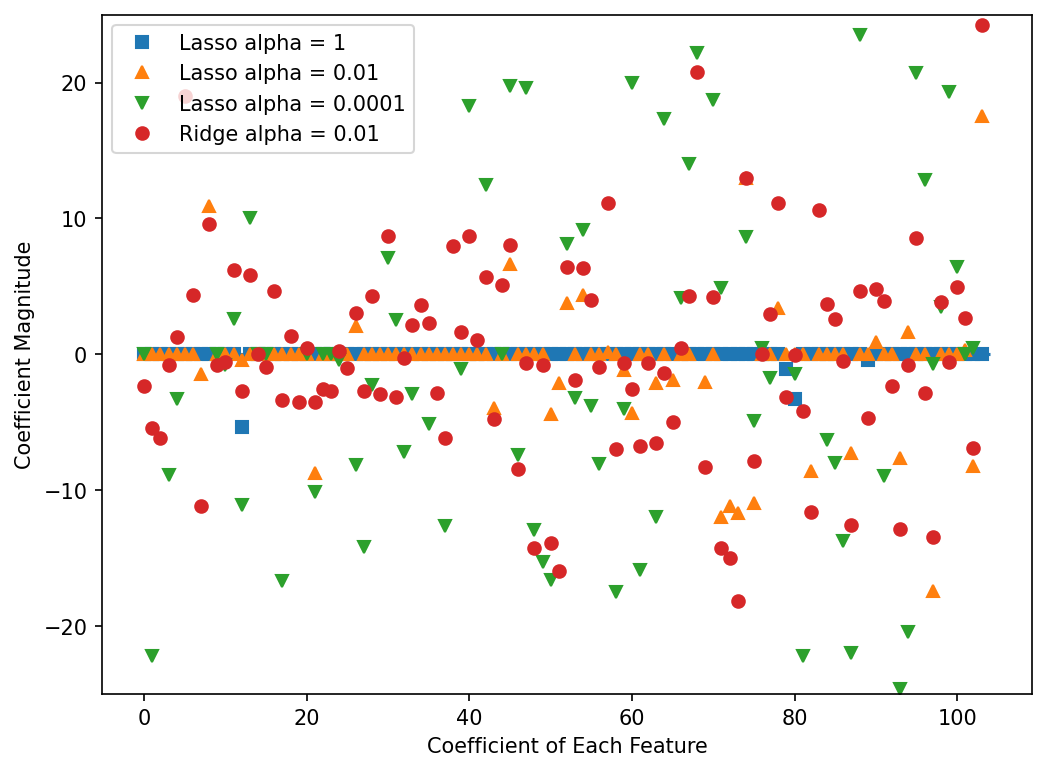

In [12]:
plt.figure(figsize=(8,6), dpi=150)
plt.plot(lasso.coef_, 's', label='Lasso alpha = 1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha = 0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha = 0.0001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha = 0.01')
plt.xlabel('Coefficient of Each Feature')
plt.ylabel('Coefficient Magnitude')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

## Linear models for classification

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


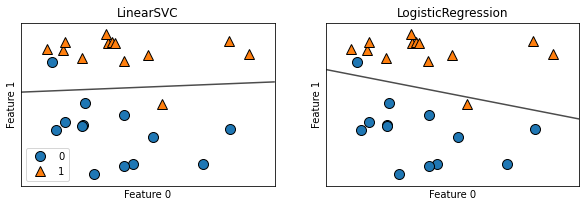

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(f'{clf.__class__.__name__}')
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
axes[0].legend()
plt.show()